In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as pp

In [4]:
nrows = 60000

In [5]:
!ls

accuracies.csv	ml-nene-Copy1.ipynb  ml-nene.ipynb
lost+found	ml-nene-dumb.ipynb   mnist_test.csv
ml-knn.ipynb	ml-nene-hint.ipynb   mnist_train.csv


In [6]:
mnist_test = pd.read_csv('./mnist_test.csv', header=None)

In [7]:
mnist_train = pd.read_csv('./mnist_train.csv', header=None, nrows=nrows)

In [8]:
cnames = ["label"] + ['px_%s.%s' % (x,y) for x in range(28) for y in range(28)]

In [9]:
mnist_train.columns = cnames

In [10]:
mnist_test.columns = cnames

In [11]:
image_size = 28

In [12]:
label_train = mnist_train['label'].values

In [13]:
label_train.shape

(60000,)

In [14]:
label_test = mnist_test['label'].values

In [15]:
label_test.shape

(10000,)

In [16]:
image_train = mnist_train.values[:, 1:]

In [17]:
image_train.shape

(60000, 784)

In [18]:
image_test = mnist_test.values[:, 1:]

In [19]:
image_test.shape

(10000, 784)

In [20]:
image_train = image_train.reshape(nrows, 28, 28)

In [21]:
image_test = image_test.reshape(10000, 28, 28)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
lines_train = image_train.reshape(nrows, 784)

In [24]:
lines_test = image_test.reshape(10000, 784)

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
#activations = [ 'identity', 'logistic', 'tanh', 'relu']
activations = [ 'relu']

In [27]:
def hls_equals(value):
    return (value, value)

def hls_divby2(value):
    return (value, value // 2)

def hls_divby3(value):
    return (value, value // 3)

def hls_divby4(value):
    return (value, value // 4)

In [28]:
hlss = {
    'divby2': hls_divby2,
    'divby3': hls_divby3,
    'divby4': hls_divby4,
    'equals': hls_equals,
}

In [29]:
def try_activations(ranges, hlsf):
    ranges = list(ranges)
    accuracies = np.zeros((len(ranges), len(activations)))
    
    for i, factor in enumerate(ranges):
        hls = hlsf(factor)
        
        for j, activation in enumerate(activations):
            print(f'run: {activation} @ {hls}')
            mlpc = MLPClassifier(activation=activation, random_state=0, hidden_layer_sizes=hls)
            %time mlpc = mlpc.fit(lines_train, label_train)

            pp.plot(range(mlpc.n_iter_), mlpc.loss_curve_)
            pp.show()
            print()

            preds_test = mlpc.predict(lines_test)

            accuracies[i, j] = accuracy_score(label_test, preds_test)
            print(accuracies[i, j])
            print()


        #print (f'hidden layer sizes: {hls}')
        #pp.bar(activations, accuracies[i, :])
        #pp.show()
        
    #print(f'per-activation effectiveness')

    #str_ranges = [str(factor) for factor in ranges]
    #for j, activation in enumerate(activations):
    #    print(f'activation: {activation}')
    #    pp.bar(str_ranges, accuracies[:, j])
    #    pp.show()
        
    return accuracies

In [30]:
factors = list(range(800, 0, -100))

run: relu @ (800, 400)
CPU times: user 10min 31s, sys: 20min 43s, total: 31min 15s
Wall time: 3min 53s


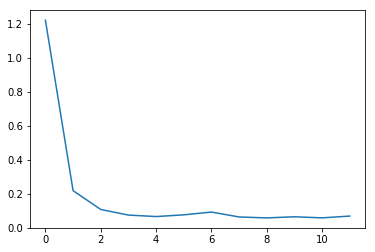


0.9638

run: relu @ (700, 350)
CPU times: user 27min 41s, sys: 49min 32s, total: 1h 17min 13s
Wall time: 9min 32s


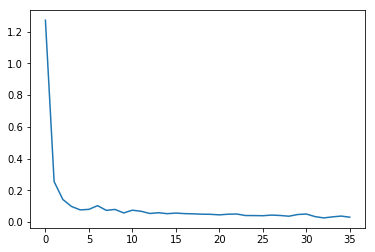


0.9751

run: relu @ (600, 300)
CPU times: user 5min 31s, sys: 10min 31s, total: 16min 3s
Wall time: 1min 58s


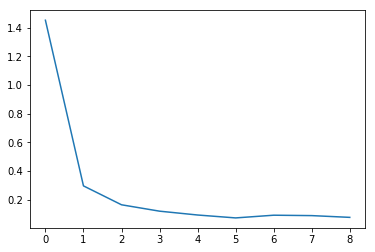


0.9616

run: relu @ (500, 250)
CPU times: user 6min 41s, sys: 13min 24s, total: 20min 6s
Wall time: 2min 30s


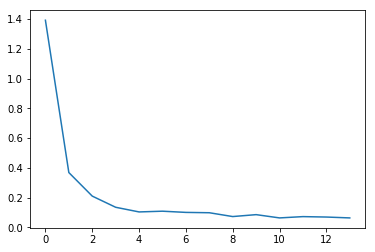


0.9697

run: relu @ (400, 200)
CPU times: user 3min 45s, sys: 7min 30s, total: 11min 16s
Wall time: 1min 24s


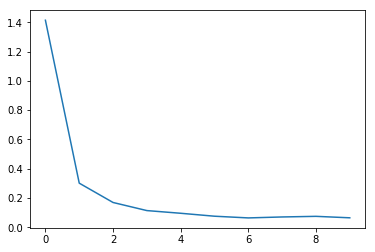


0.9643

run: relu @ (300, 150)
CPU times: user 7min 7s, sys: 14min 42s, total: 21min 49s
Wall time: 2min 43s


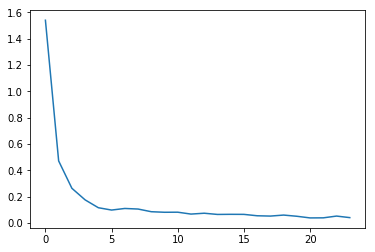


0.9741

run: relu @ (200, 100)
CPU times: user 4min 3s, sys: 8min 18s, total: 12min 21s
Wall time: 1min 34s


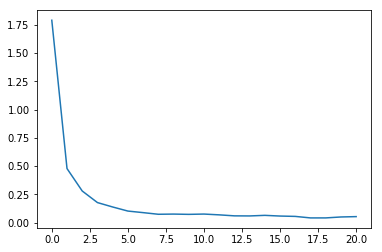


0.9633

run: relu @ (100, 50)
CPU times: user 3min 39s, sys: 8min 36s, total: 12min 15s
Wall time: 1min 34s


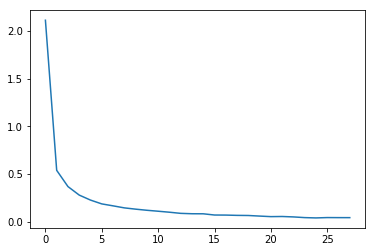


0.9682

run: relu @ (800, 266)
CPU times: user 7min 8s, sys: 13min 21s, total: 20min 29s
Wall time: 2min 28s


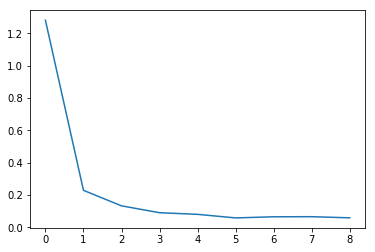


0.9609

run: relu @ (700, 233)
CPU times: user 5min 32s, sys: 11min 22s, total: 16min 54s
Wall time: 2min 3s


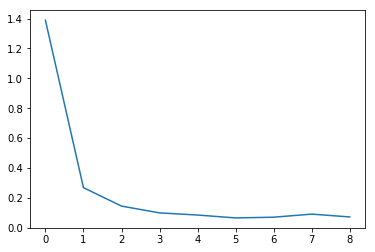


0.9619

run: relu @ (600, 200)
CPU times: user 8min 28s, sys: 15min 5s, total: 23min 33s
Wall time: 2min 52s


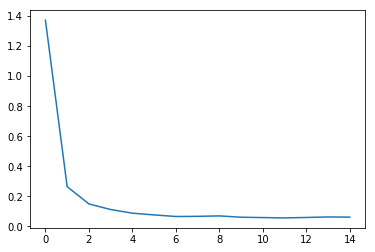


0.9674

run: relu @ (500, 166)
CPU times: user 7min 56s, sys: 14min 19s, total: 22min 15s
Wall time: 2min 9s


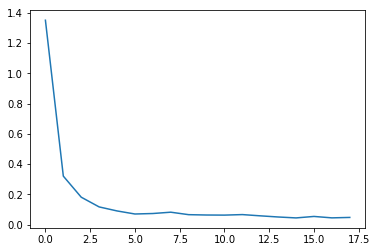


0.9652

run: relu @ (400, 133)
CPU times: user 10min 13s, sys: 16min 33s, total: 26min 46s
Wall time: 1min 44s


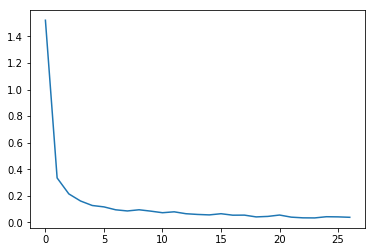


0.9738

run: relu @ (300, 100)
CPU times: user 8min 36s, sys: 13min 22s, total: 21min 59s
Wall time: 1min 26s


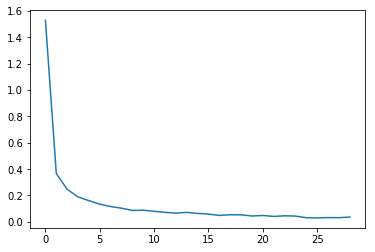


0.9732

run: relu @ (200, 66)
CPU times: user 4min 1s, sys: 6min 58s, total: 11min
Wall time: 44.3 s


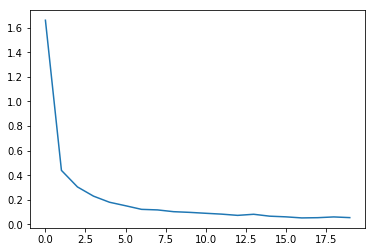


0.9675

run: relu @ (100, 33)
CPU times: user 4min 16s, sys: 7min 32s, total: 11min 48s
Wall time: 48.5 s


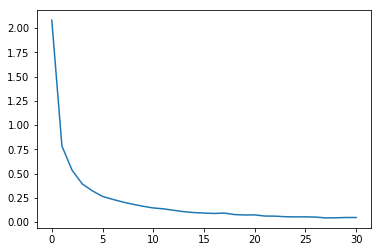


0.9643

run: relu @ (800, 200)
CPU times: user 11min 58s, sys: 18min 39s, total: 30min 38s
Wall time: 1min 57s


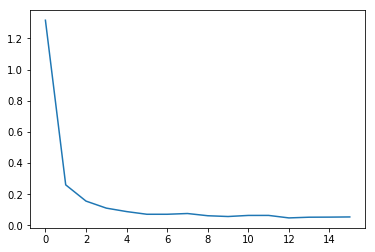


0.968

run: relu @ (700, 175)
CPU times: user 7min 42s, sys: 11min 49s, total: 19min 31s
Wall time: 1min 15s


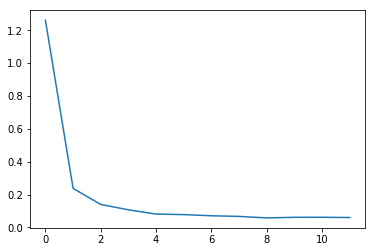


0.9646

run: relu @ (600, 150)
CPU times: user 12min 50s, sys: 19min 40s, total: 32min 31s
Wall time: 2min 5s


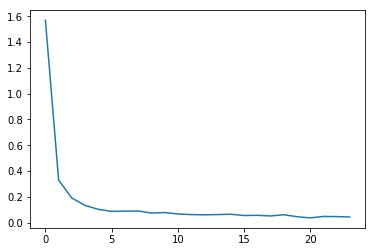


0.9759

run: relu @ (500, 125)
CPU times: user 12min 49s, sys: 19min 59s, total: 32min 48s
Wall time: 2min 7s


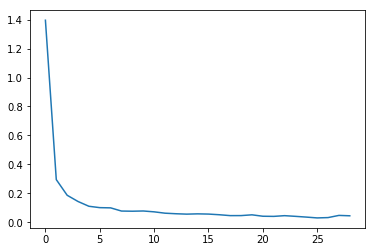


0.9782

run: relu @ (400, 100)
CPU times: user 7min 38s, sys: 12min 6s, total: 19min 44s
Wall time: 1min 17s


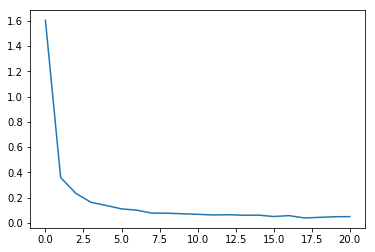


0.9698

run: relu @ (300, 75)
CPU times: user 7min 11s, sys: 11min 26s, total: 18min 37s
Wall time: 1min 13s


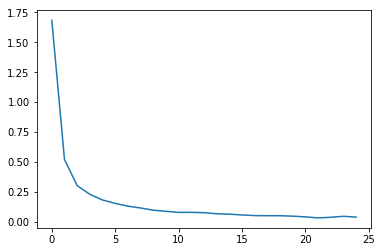


0.9726

run: relu @ (200, 50)
CPU times: user 5min 51s, sys: 10min 33s, total: 16min 25s
Wall time: 1min 5s


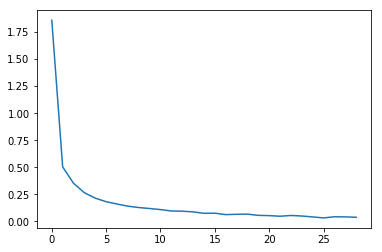


0.9709

run: relu @ (100, 25)
CPU times: user 4min 25s, sys: 7min 41s, total: 12min 7s
Wall time: 50 s


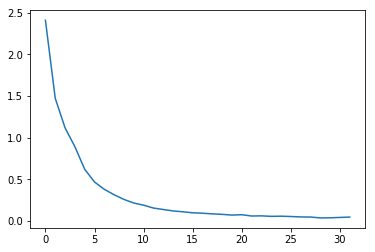


0.9694

run: relu @ (800, 800)
CPU times: user 18min 10s, sys: 27min 19s, total: 45min 30s
Wall time: 2min 53s


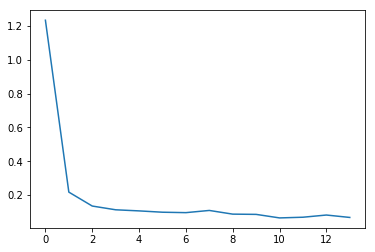


0.9672

run: relu @ (700, 700)
CPU times: user 17min 51s, sys: 27min 24s, total: 45min 16s
Wall time: 2min 52s


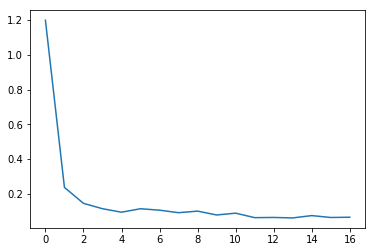


0.9702

run: relu @ (600, 600)
CPU times: user 22min 11s, sys: 33min 38s, total: 55min 50s
Wall time: 3min 33s


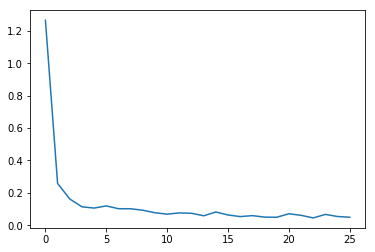


0.9682

run: relu @ (500, 500)
CPU times: user 12min 27s, sys: 18min 19s, total: 30min 47s
Wall time: 1min 58s


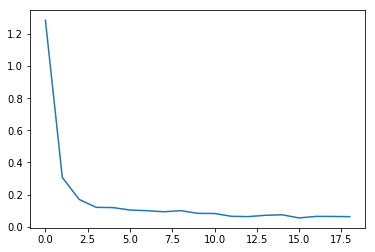


0.9736

run: relu @ (400, 400)
CPU times: user 4min 26s, sys: 6min 47s, total: 11min 14s
Wall time: 43.7 s


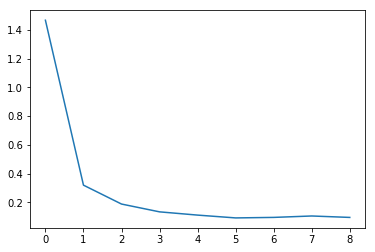


0.9624

run: relu @ (300, 300)
CPU times: user 4min 26s, sys: 6min 42s, total: 11min 8s
Wall time: 43.7 s


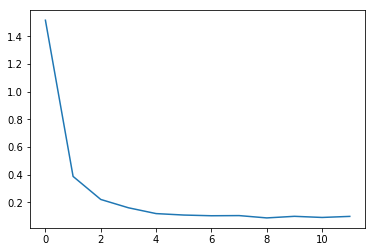


0.9671

run: relu @ (200, 200)
CPU times: user 5min 38s, sys: 9min 15s, total: 14min 53s
Wall time: 59.1 s


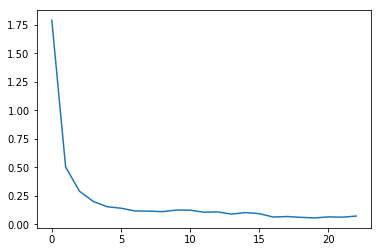


0.9645

run: relu @ (100, 100)
CPU times: user 4min 40s, sys: 7min 56s, total: 12min 36s
Wall time: 51.6 s


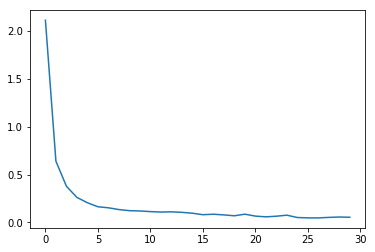


0.9678



In [31]:
accuracies_per_hlsf = {}
for hlsf in hlss:
    accuracies_per_hlsf[hlsf] = try_activations(factors, hlss[hlsf])

In [32]:
accuracies_per_hlsf

{'divby2': array([[0.9638],
        [0.9751],
        [0.9616],
        [0.9697],
        [0.9643],
        [0.9741],
        [0.9633],
        [0.9682]]), 'divby3': array([[0.9609],
        [0.9619],
        [0.9674],
        [0.9652],
        [0.9738],
        [0.9732],
        [0.9675],
        [0.9643]]), 'divby4': array([[0.968 ],
        [0.9646],
        [0.9759],
        [0.9782],
        [0.9698],
        [0.9726],
        [0.9709],
        [0.9694]]), 'equals': array([[0.9672],
        [0.9702],
        [0.9682],
        [0.9736],
        [0.9624],
        [0.9671],
        [0.9645],
        [0.9678]])}

In [33]:
accuracies_list = [
    (hlsf, factors[factor], activations[activation], accuracies_per_hlsf[hlsf][factor][activation])
    for hlsf in hlss
    for factor in range(len(factors))
    for activation in range(len(activations))
]

In [34]:
accuracies = pd.DataFrame(accuracies_list, columns=['hlsf','factor','activation','accuracy'])

In [35]:
accuracies

,hlsf,factor,activation,accuracy
0,divby2,800,relu,0.9638
1,divby2,700,relu,0.9751
2,divby2,600,relu,0.9616
3,divby2,500,relu,0.9697
4,divby2,400,relu,0.9643
5,divby2,300,relu,0.9741
6,divby2,200,relu,0.9633
7,divby2,100,relu,0.9682
8,divby3,800,relu,0.9609
9,divby3,700,relu,0.9619


In [36]:
accuracies.iloc[[accuracies['accuracy'].idxmax()]]

,hlsf,factor,activation,accuracy
19,divby4,500,relu,0.9782


In [37]:
accuracies.to_csv('accuracies.csv')

In [38]:
accuracies.sort_values('accuracy', ascending=False)

,hlsf,factor,activation,accuracy
19,divby4,500,relu,0.9782
18,divby4,600,relu,0.9759
1,divby2,700,relu,0.9751
5,divby2,300,relu,0.9741
12,divby3,400,relu,0.9738
27,equals,500,relu,0.9736
13,divby3,300,relu,0.9732
21,divby4,300,relu,0.9726
22,divby4,200,relu,0.9709
25,equals,700,relu,0.9702
